In [975]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
%matplotlib inline
from tqdm.notebook import tqdm

In [3]:
pd.set_option('display.max_columns', None)

In [876]:
data = pd.read_csv('insurance.csv')

### Data Prep

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


#### The record will be kept in the analysis, as there is a slim change that it would be a different claim but for the same procedure. Also, as it is only one record that is duplicated, it won't have a determining factor in the analysis

In [7]:
ins = data.drop_duplicates(keep='first')

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 1a. Generate new column - age_cat

In [877]:
def i(data):    
    if data.age <= 24:
        val='Young'
    elif 25 <= data.age <= 55:
        val='Adult'
    else:
        val='Elder'
    return val

data['age_cat'] = data.apply(i, axis=1)

In [878]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young
1,18,male,33.770,1,no,southeast,1725.55230,Young
2,28,male,33.000,3,no,southeast,4449.46200,Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult


## 1b. Generate new column - weight

In [879]:
def i(data):    
    if data.bmi < 18.5:
        val='Under Weight'
    elif 18.5 <= data.bmi < 24.9:
        val='Normal Weight'
    elif 25 <= data.bmi < 29.9:
        val='Over Weight'
    else:
        val='Obese'
    return val

data['weight'] = data.apply(i, axis=1)

In [12]:
data.weight.value_counts()

Obese            722
Over Weight      374
Normal Weight    222
Under Weight      20
Name: weight, dtype: int64

In [883]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## 2. Smokers Analysis

In [13]:
smoke = data.groupby(['sex','smoker']).count()[['age']]

In [14]:
smoke.columns = ['count']
smoke

count
sex    smoker       
female no        547
       yes       115
male   no        517
       yes       159

In [15]:
smoke['perc'] = smoke / smoke.groupby(level=0).sum()

In [16]:
smoke

count      perc
sex    smoker                 
female no        547  0.826284
       yes       115  0.173716
male   no        517  0.764793
       yes       159  0.235207

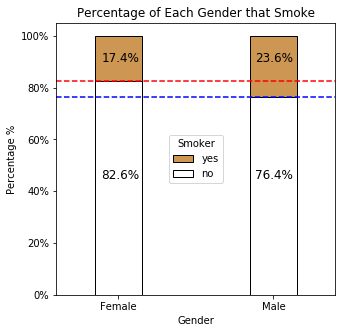

In [342]:
fig = smoke['perc'].unstack().plot(kind='bar',
                                   stacked=True,
                                   figsize=(5,5),
                                   edgecolor='black',
                                   color=['white','#CD9653'],
                                   width=0.3)
plt.title('Percentage of Each Gender that Smoke')
plt.xlabel('Gender')
plt.ylabel('Percentage %')
fig.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.00))
plt.tick_params(axis='x', which='major',rotation=0)
plt.axhline(y=0.826, linestyle='--',color='r')
plt.text(x=-0.11,y=0.9, s='17.4%', alpha=1, color='black',size=12)
plt.text(x=-0.11,y=0.45, s='82.6%', alpha=1, color='black',size=12)
plt.axhline(y=0.764, linestyle='--',color='b')
plt.text(x=0.88,y=0.9, s='23.6%', alpha=1, color='black',size=12)
plt.text(x=0.88,y=0.45, s='76.4%', alpha=1, color='black',size=12)
handles, labels = fig.get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels), title='Smoker', loc=10)
plt.xticks([0, 1],['Female','Male'])
plt.savefig('Gender Smokers',transparent=True,bbox_inches='tight')

From the dataset, it is shown that Male's have a higher percentage of smokers, with 23.6% compared to 17.4% that are Female.

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,Young,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Over Weight


In [19]:
GenCharSum = pd.pivot_table(data,values='charges',index=['age'],columns='sex',aggfunc=np.sum)

In [211]:
GenCharSum.head()

sex,female,male
age,,
18,215234.511319,273714.50007
19,317189.382980,345668.45177
20,102926.846000,191704.38835
21,69555.130520,62897.87071
22,99265.862300,181096.25615


In [192]:
from numpy import arange

(18, 64)

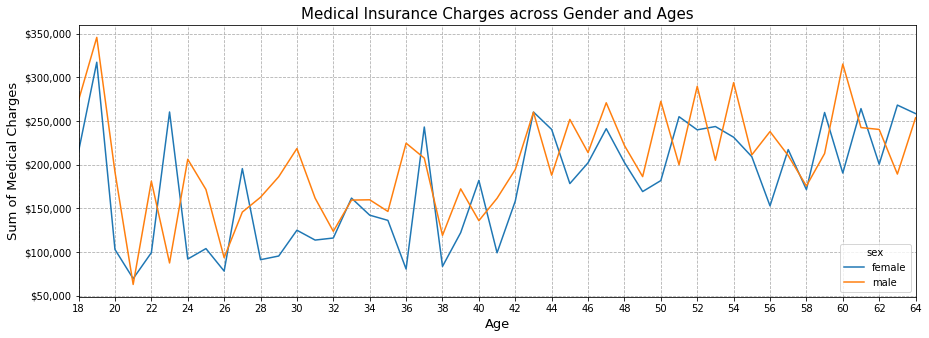

In [225]:
fig = GenCharSum.plot(figsize=(15,5))
plt.title('Medical Insurance Charges across Gender and Ages',size=15)
plt.xlabel('Age', size=13)
plt.ylabel('Sum of Medical Charges',size=13)
fig.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
fig.grid(linestyle=('--'))
fig.tick_params(axis='x', which='major')
plt.xticks(arange(65, step=2))
fig.set_xlim([18, 64])

In [202]:
GenCharCount = pd.pivot_table(data,values='charges',index=['age'],columns='sex',aggfunc=ma.count)

In [23]:
GenCharCount.head()

sex,female,male
age,,
18,33.0,36.0
19,33.0,35.0
20,14.0,15.0
21,13.0,15.0
22,13.0,15.0


In [24]:
GenCharMean = pd.pivot_table(data,values='charges',index=['age'],columns='sex',aggfunc=np.mean)

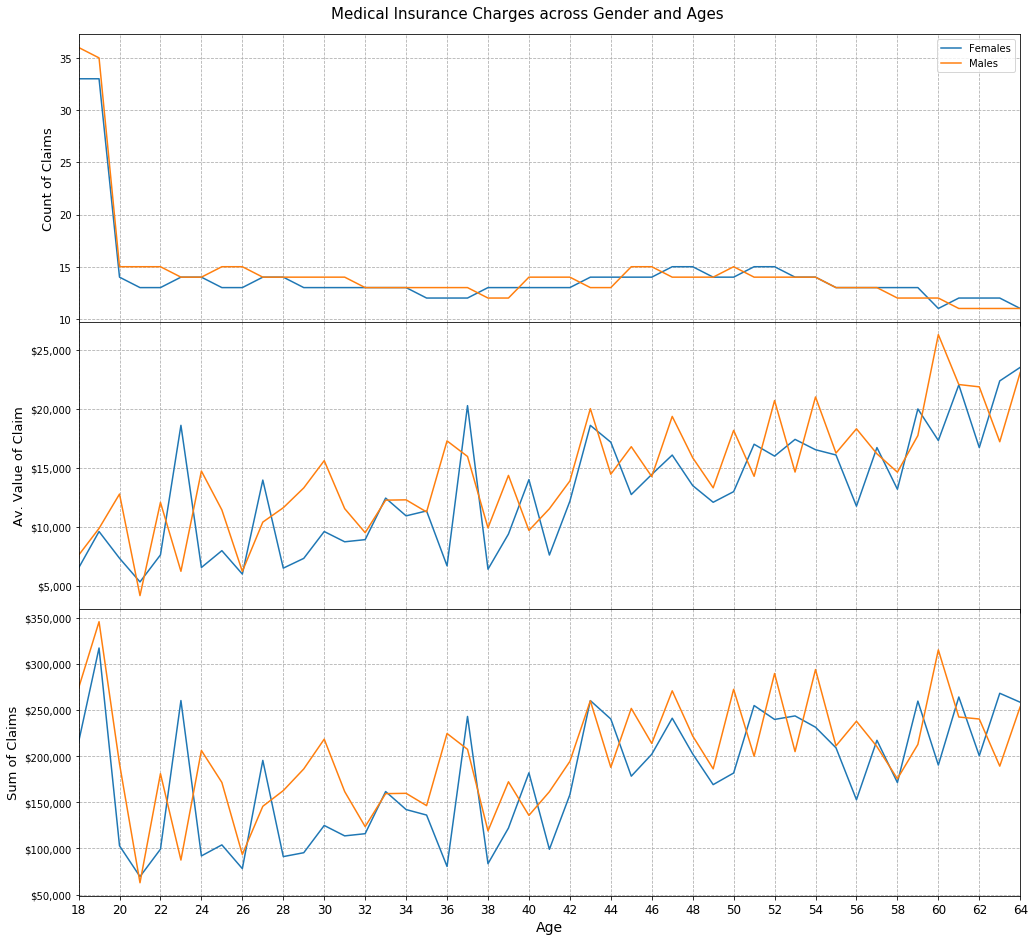

In [238]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1,
                              figsize=(14,13),
                              sharex='all',
                              gridspec_kw={'hspace': 0})
ax1.plot(GenCharCount)
ax2.plot(GenCharMean)
ax3.plot(GenCharSum)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle('Medical Insurance Charges across Gender and Ages',size=15)
ax1.set_ylabel('Count of Claims',size=13)
ax2.set_ylabel('Av. Value of Claim',size=13)
ax3.set_ylabel('Sum of Claims',size=13)
ax3.set_xlabel('Age',size=14)
plt.xticks(arange(65, step=2),size=12)
ax3.set_xlim([18, 64])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
ax3.grid(linestyle='--')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax3.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax1.legend(['Females','Males'],loc='best')
plt.savefig('Age and Gender vs Charges',bbox_inches='tight')

In [302]:
WeiCharSum = pd.pivot_table(data,values='charges',index=['age'],columns=['weight'],aggfunc=np.mean)

In [321]:
WeiCharSum = WeiCharSum[['Obese','Over Weight','Normal Weight','Under Weight']]

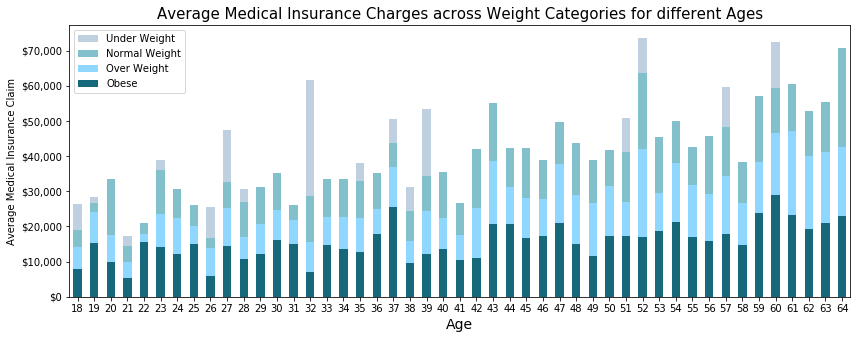

In [887]:
colors = ['#900C3F','#C70039','#FF5733','#FFC30F']
colors1 = ['#16697A','#90D7FF','#82C0CC','#BFD0E0','#B8B3BE']
ax = WeiCharSum.plot(kind='bar',stacked=True, figsize=(14,5),color=colors1)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', which='major', labelsize=10,rotation=0)
ax.set_title('Average Medical Insurance Charges across Weight Categories for different Ages',size=15)
ax.set_xlabel('Age',size=14)
ax.set_ylabel('Average Medical Insurance Claim')
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels))
plt.savefig('stack_Charges for weight and age',bbox_inches='tight')

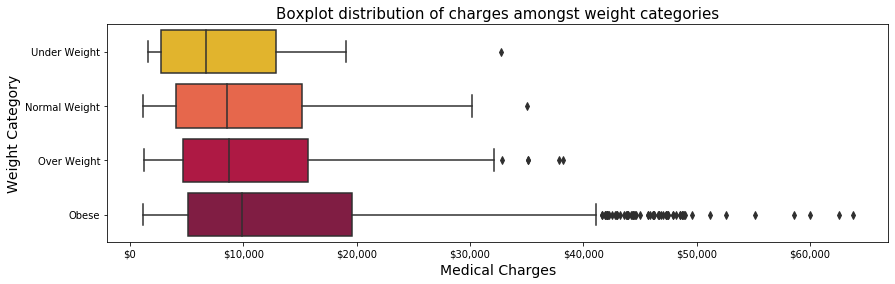

In [826]:
plt.figure(figsize=(14,4))
ax = sns.boxplot(y=data['weight'],
                 x=data['charges'],
                 order=['Under Weight','Normal Weight','Over Weight','Obese'],
                palette=reversed(colors))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_title('Boxplot distribution of charges amongst weight categories',size=15)
ax.set_xlabel('Medical Charges',size=14)
ax.set_ylabel('Weight Category',size=14)
plt.savefig('boxplot_Charges distribution for weight',bbox_inches='tight')

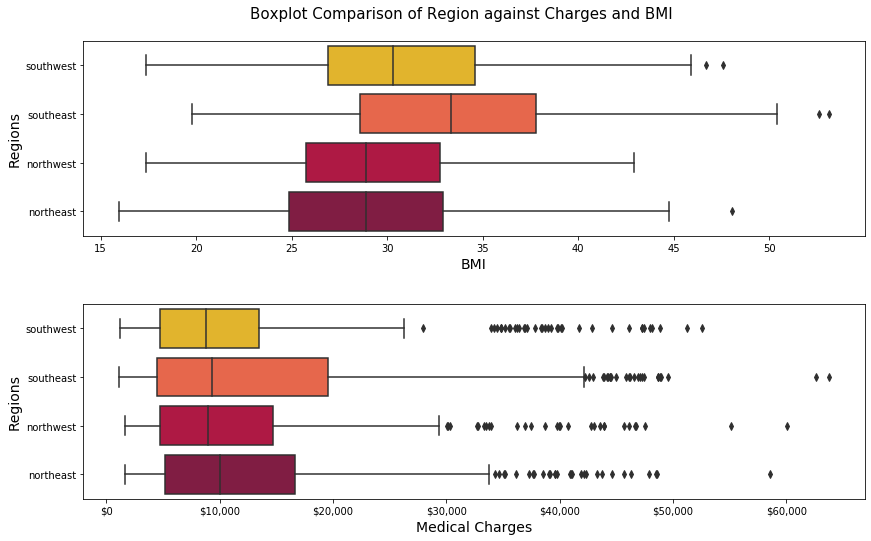

In [870]:
fig, (ax1,ax2) = plt.subplots(2, 1,
                              figsize=(14,8),
                             gridspec_kw={'hspace': .35})
ax2 = sns.boxplot(y=data['region'],
                 x=data['charges'],
                palette=reversed(colors),
                 ax=ax2)
ax2.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
fig.subplots_adjust(top=0.92)
plt.suptitle('Boxplot Comparison of Region against Charges and BMI',size=15)
ax2.set_xlabel('Medical Charges',size=14)
ax2.set_ylabel('Regions',size=14)
ax1 = sns.boxplot(y=data['region'],
                 x=data['bmi'],
                palette=reversed(colors),
                 ax=ax1)
ax1.set_xlabel('BMI',size=14)
ax1.set_ylabel('Regions',size=14)
plt.savefig('Age and Gender vs Charges',bbox_inches='tight')

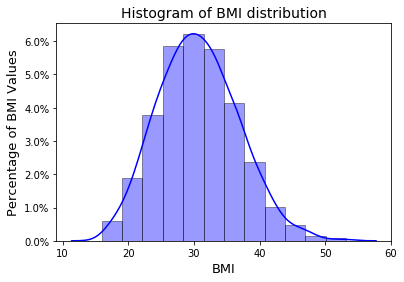

In [869]:
fig=sns.distplot(data.bmi,
             hist=True,
             kde=True,
             bins=int(60/5),
             color='b',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of BMI distribution',size=14)
plt.xlabel('BMI',size=13)
plt.ylabel('Percentage of BMI Values',size=13)
fig.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.savefig('BMI dist',bbox_inches='tight')

In [788]:
bmi_bin = pd.cut(data.bmi,bins=np.linspace(15,55,9))
bmi_group = pd.merge(data,bmi_bin,right_index=True,left_index=True)
bmi_group = pd.DataFrame(bmi_group.groupby('bmi_y')['charges'].mean())

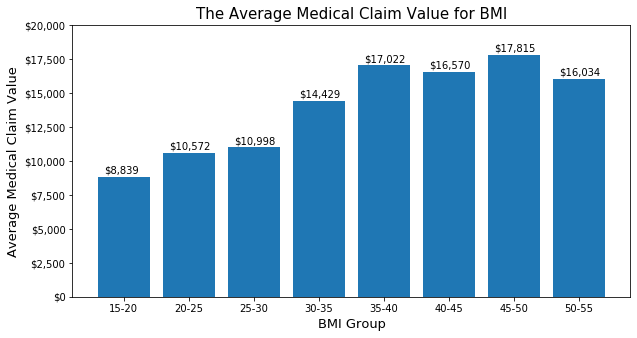

In [858]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
plt.bar(bmi_group.index.astype('str'),bmi_group.charges)
plt.title('The Average Medical Claim Value for BMI', size=15)
plt.xlabel('BMI Group', size=13)
plt.ylabel('Average Medical Claim Value', size=13)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
labels=['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55']
ax.set_xticklabels(labels)
ax.set_ylim(0,20000)
for i, v in enumerate(bmi_group.charges):
    currency = "${:,.0f}".format(v)
    plt.text(i - 0.3, v + 250, str(currency))
    
plt.savefig('BMI grouped charges',bbox_inches='tight')

In [765]:
SmoCharSum = pd.pivot_table(data,values='charges',index=['age'],columns=['smoker'],aggfunc=np.mean)

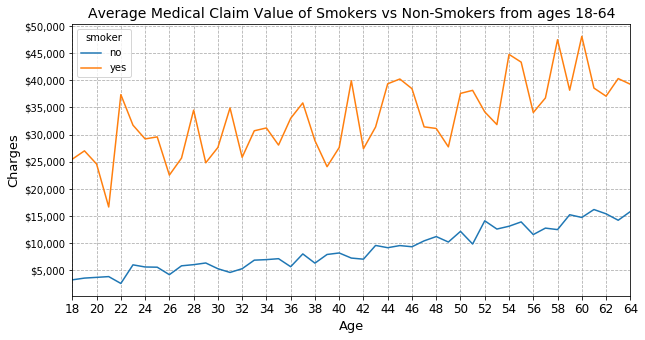

In [865]:
ax = SmoCharSum.plot(figsize=(10,5))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', which='major', labelsize=10,rotation=0)
plt.title('Average Medical Claim Value of Smokers vs Non-Smokers from ages 18-64',size=14)
plt.xticks(arange(65, step=2),size=12)
plt.yticks(np.arange(5000,55000,step=5000))
plt.xlim([18,64])
ax.grid(linestyle='--')
plt.xlabel('Age',size=13)
plt.ylabel('Charges',size=13)
plt.savefig('Smokers comparison',bbox_inches='tight')

In [30]:
SmoCharSum = pd.pivot_table(data,values='charges',index=['age'],columns=['smoker'],aggfunc=np.mean)

In [645]:
age_bmi = data.groupby(data.age).mean()

In [622]:
age_pivot = data.pivot_table(index='age',values='charges')

Text(0, 0.5, 'Charges')

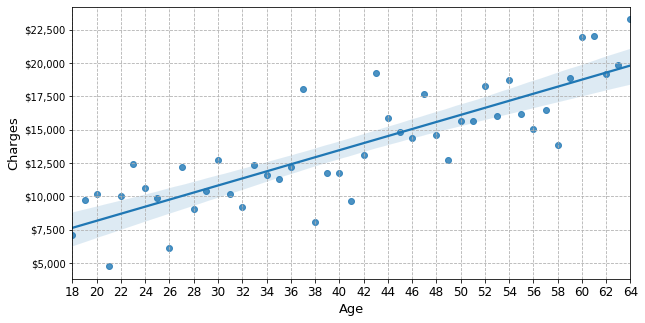

In [712]:
plt.figure(figsize=(10,5))
ax = sns.regplot(age_pivot.index,age_pivot.charges)
plt.xticks(arange(65, step=2),size=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.xlim([18,64])
ax.grid(linestyle='--')
plt.xlabel('Age',size=13)
plt.ylabel('Charges',size=13)

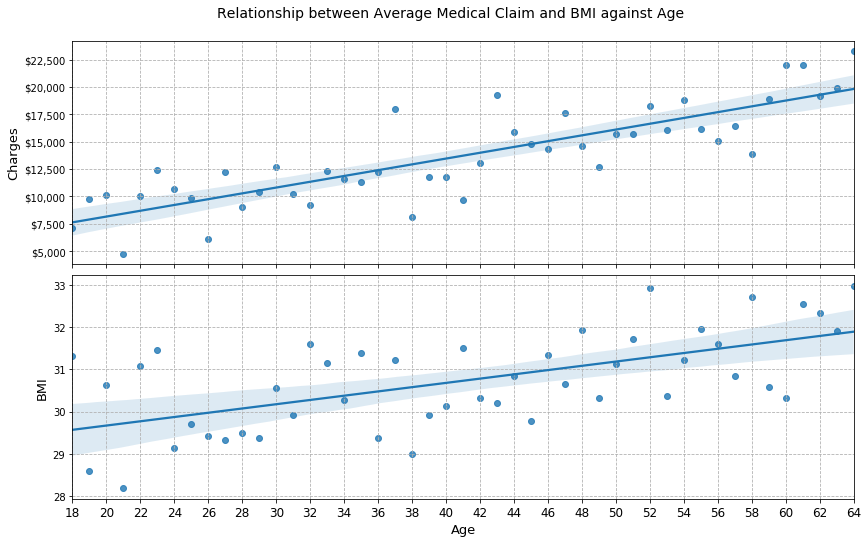

In [871]:
fig, (ax1,ax2) = plt.subplots(2, 1,
                              figsize=(14,8),
                              sharex='all',
                              gridspec_kw={'hspace': 0.05})

sns.regplot(age_pivot.index,age_pivot.charges, ax=ax1)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
fig.subplots_adjust(top=0.92)
plt.suptitle('Relationship between Average Medical Claim and BMI against Age',size=14)
ax1.set_ylabel('Charges',size=13)
ax1.set_xlabel('')

sns.regplot(age_bmi.index,age_bmi.bmi, ax=ax2)
plt.xticks(arange(65, step=2),size=12)
ax2.set_ylabel('BMI',size=13)
ax2.set_xlabel('Age',size=13)
plt.xlim([18,64])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
plt.savefig('BMI and Age against charges',bbox_inches='tight')

#### Age has a 0.3 positive correlation with Charges, while BMI has a 0.2 positive correlation

In [927]:
kids = pd.DataFrame(data.groupby('children')['charges'].agg(['count','mean']))
kids

,count,mean
children,,
0,574,12365.975602
1,324,12731.171832
2,240,15073.563734
3,157,15355.318367
4,25,13850.656311
5,18,8786.035247


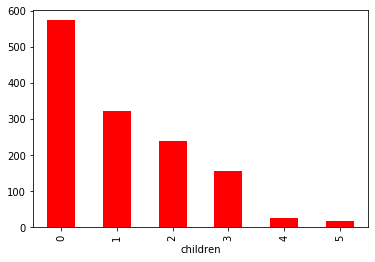

In [940]:
kids['count'].plot(color='r',kind='bar')

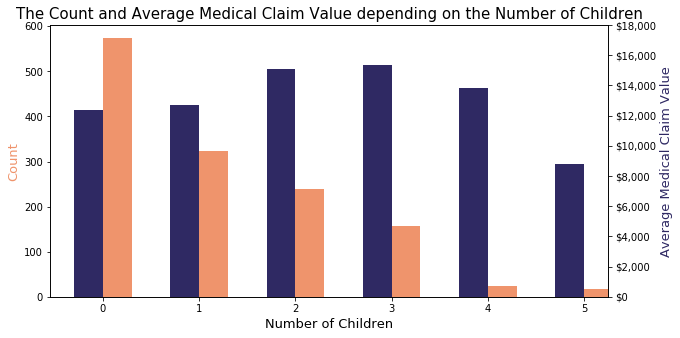

In [962]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax2 = ax.twinx()
kids['count'].plot(color='#EF946C',kind='bar',ax=ax,position=0,width=0.3)
kids['mean'].plot(color='#2F2963',kind='bar',ax=ax2,position=1,width=0.3)
plt.title('The Count and Average Medical Claim Value depending on the Number of Children', size=15)
ax.set_xlabel('Number of Children', size=13)
ax.set_ylabel('Count',color='#EF946C',size=13)
ax2.set_ylabel('Average Medical Claim Value',color='#2F2963', size=13)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax2.set_ylim(0,18000)
ax.tick_params(axis='x', which='major', labelsize=10,rotation=0)
plt.savefig('Children costs',bbox_inches='tight')

## 2d. Build an Estimator

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,Young,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Adult,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Adult,Over Weight


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
cat_list = ['sex','smoker','region','age_cat','weight','children']

In [35]:
num_list = ['age','bmi']

In [36]:
for ele in cat_list:
    add = pd.get_dummies(data[ele], prefix=ele)
    data1 = data.join(add)
    # join columns with old dataframe
    data = data1

In [37]:
data_vars = data.columns.values.tolist() # column headers are converted into a list
to_keep = [i for i in data_vars if i not in cat_list]
#create a new list by comparing with the list of categorical variables - 'cat_list'

In [38]:
data_final = data[to_keep]
data_final.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_cat_Adult,age_cat_Elder,age_cat_Young,weight_Normal Weight,weight_Obese,weight_Over Weight,weight_Under Weight,children_0,children_1,children_2,children_3,children_4,children_5
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0
1,18,33.770,1725.55230,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,28,33.000,4449.46200,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,33,22.705,21984.47061,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,32,28.880,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [39]:
data_final1 = data_final.astype({'bmi':'int64','charges':'int64'})

### Creating Train/Test split

In [40]:
from sklearn.model_selection import train_test_split

In [68]:
X_features = data_final1.columns.values

In [72]:
X = X_features[X_features != 'charges']

In [66]:
y = data_final1.charges

In [968]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=0)

### Scale Data

In [51]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler().fit(X_train)

In [77]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Creation

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

### Linear Regression

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Training Model Accuracy and Error

In [80]:
#Train Accuracy
print(r2_score(y_train,lr.predict(X_train)))

#Train Error
print(sqrt(mean_squared_error(y_train, lr.predict(X_train))))

0.7463641021150154
6030.15540069318


In [79]:
#Test
y_preds = lr.predict(X_test)

#### Testing Model Accuracy and Error

In [81]:
#Test Accuracy
print(r2_score(y_test,y_preds))

#Test Error
print(sqrt(mean_squared_error(y_test, y_preds)))

0.8012121469342226
5624.342592265961


### Random Forest

In [970]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Training Model Accuracy and Error

In [971]:
#Train Accuracy
print(r2_score(y_train,rf.predict(X_train)))

#Train Error
print(sqrt(mean_squared_error(y_train, rf.predict(X_train))))

0.9731713768211269
1961.202800850601


Overfitting seems to be an issue, as the accuracy is 97.3%.
K-Fold Cross Validation will be used to establish better parameters that will limit the issue. 

In [972]:
#Test
y_preds = rf.predict(X_test)

#### Testing Model Accuracy and Error

In [973]:
#Test Accuracy
print(r2_score(y_test,y_preds))

#Test Error
print(sqrt(mean_squared_error(y_test, y_preds)))

0.8788898834901525
4390.016888013107


### Model Tuning

In [977]:
from sklearn.model_selection import GridSearchCV

In [978]:
grid_parameters = {'n_estimators': [30, 60, 100, 200],
                   'max_depth':[10,15,20,30],
                   'min_samples_leaf':[1,2,5,10,20],
                   'min_samples_split':[1,2,5,10,20]}

In [979]:
rf_mt = RandomForestRegressor()

In [980]:
rf_gscv = GridSearchCV(rf_mt, grid_parameters, cv=5)

In [982]:
rf_gscv.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [983]:
rf_gscv.best_params_

{'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 30}

In [984]:
rf_gscv.best_score_

0.8466853641700951

In [986]:
rf_optimal = RandomForestRegressor(max_depth = 20,
                                    min_samples_leaf=10,
                                    min_samples_split=20,
                                   n_estimators=30)
rf_optimal.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [987]:
y_pred = rf_optimal.predict(X_test)

In [995]:
#Train Accuracy
train_rf_r2 = r2_score(y_train,rf_optimal.predict(X_train))
print(train_rf_r2)

#Train Error
train_rf_rmse = sqrt(mean_squared_error(y_train, rf_optimal.predict(X_train)))
print(train_rf_rmse)

0.8821470046821541
4110.4902692361175


In [996]:
#Test Accuracy
test_rf_r2 = r2_score(y_test,y_preds)
print(test_rf_r2)

#Test Error
test_rf_rmse = sqrt(mean_squared_error(y_test, y_preds))
print(test_rf_rmse)

0.8788898834901525
4390.016888013107


In [1038]:
RF = pd.DataFrame(['RF',train_rf_r2,train_rf_rmse,test_rf_r2,test_rf_rmse])
RF = RF.transpose()
RF.columns = ['Models','Score_x','Error_x','Score_y','Score_y']
RF = RF.set_index('Models')
RF = pd.concat([RF.filter(like='x'),
           RF.filter(like='y')],
           axis=1,
           keys=('Training','Testing'))
RF

Training           Testing         
         Score_x  Error_x  Score_y  Score_y
Models                                     
RF      0.882147  4110.49  0.87889  4390.02

### Lasso

In [86]:
lm = Lasso()
lm.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Training Model Accuracy and Error

In [87]:
#Train Accuracy 
print(r2_score(y_train,lm.predict(X_train)))

#Train Error
print(sqrt(mean_squared_error(y_train, lm.predict(X_train))))

0.7463615212586872
6030.186080351041


In [88]:
#Test
y_preds = lm.predict(X_test)

#### Testing Model Accuracy and Error

In [89]:
#Test Accuracy
print(r2_score(y_test,y_preds))

#Test Error
print(sqrt(mean_squared_error(y_test, y_preds)))

0.8013847619570078
5621.900147074045


### Ridge

In [90]:
rm = Ridge()
rm.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
#Test
y_preds = rm.predict(X_test)

In [92]:
#Accuracy
r2_score(y_test,y_preds)

0.8013290526739121

Ridge Regressor requires the variables to be scaled due to the model being computated by distance, therefore, imposing a penalty depending on the size of the coefficient. If the numbers are not scaled, then there will not be a fair penalisation.

In [93]:
#Train Scaled
rm = Ridge()
rm.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Training Model Accuracy and Error

In [94]:
#Train Accuracy Scaled
print(r2_score(y_train,rm.predict(X_train_scaled)))

#Train Error Scaled
print(sqrt(mean_squared_error(y_train, rm.predict(X_train))))

0.7463634301562819
189912.63819918656


In [95]:
#Test Scaled
y_preds = rm.predict(X_test_scaled)

#### Testing Model Accuracy and Error

In [96]:
#Test Accuracy Scaled
print(r2_score(y_test,y_preds))

#Train Error Scaled
print(sqrt(mean_squared_error(y_test, y_preds)))

0.8012405450510542
5623.940841252851


### SGD Regressor

In [97]:
#Train
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [98]:
#Test
y_preds = sgd.predict(X_test)

In [99]:
#Accuracy
sgd.score(X_test,y_test)

-3067728151913.212

Similar to the ridge model, SGD regressor also needs to be scaled.

In [100]:
sgd.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

#### Training Model Accuracy and Error

In [101]:
#Train Accuracy Scaled
print(r2_score(y_train,sgd.predict(X_train_scaled)))

#Train Error Scaled
print(sqrt(mean_squared_error(y_train, sgd.predict(X_train_scaled))))

0.7460286657861096
6034.14155737923


In [102]:
#Test Scaled
y_preds = sgd.predict(X_test_scaled)

#### Testing Model Accuracy and Error

In [103]:
#Test Accuracy Scaled
print(r2_score(y_test,y_preds))

#Test Error Scaled
print(sqrt(mean_squared_error(y_test, y_preds)))

0.8020752214396156
5612.119745201817


## Investigating Multicollnearity

In [104]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
data_final2 = data_final1.drop(['charges'],axis=1)

In [1040]:
# For each X, calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_final2.values, i) for i in range(data_final2.shape[1])]
vif["features"] = data_final2.columns
vif.sort_values(ascending=False, by='VIF Factor').head(10)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
11,inf,age_cat_Elder
12,inf,age_cat_Young
21,inf,children_4
20,inf,children_3
19,inf,children_2
18,inf,children_1
17,inf,children_0
16,inf,weight_Under Weight
15,inf,weight_Over Weight
14,inf,weight_Obese


As seen by these numbers, there is clear multicollinearity occuring within the features. To eliminate the initial collinearity, a feature belonging sex, smoker, region, age_cat, weight and children will be dropped.

In [1069]:
data_final3 = data_final2.drop(['sex_female',
                                'smoker_no',
                                'region_northeast',
                                'age_cat_Adult',
                                'weight_Normal Weight',
                                'children_0'],axis=1)

In [1042]:
# For each X, calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_final3.values, i) for i in range(data_final3.shape[1])]
vif["features"] = data_final3.columns

In [1043]:
vif.sort_values(ascending=False, by='VIF Factor').head(10)

,VIF Factor,features
1,46.084772,bmi
0,22.532324,age
9,9.729456,weight_Obese
10,3.331000,weight_Over Weight
8,2.295877,age_cat_Young
5,2.287788,region_southeast
7,2.270091,age_cat_Elder
2,2.023321,sex_male
6,2.003079,region_southwest
4,1.961217,region_northwest


In [1070]:
data_final4 = data_final3.drop(['weight_Obese'],axis=1)

In [1071]:
# For each X, calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_final4.values, i) for i in range(data_final4.shape[1])]
vif["features"] = data_final4.columns
vif.sort_values(ascending=False, by='VIF Factor').head(10)

,VIF Factor,features
0,19.744327,age
1,19.712822,bmi
5,2.277072,region_southeast
7,2.190304,age_cat_Elder
8,2.093262,age_cat_Young
2,2.019681,sex_male
6,2.001118,region_southwest
4,1.957959,region_northwest
11,1.688166,children_1
12,1.537747,children_2


#### Despite 'age' and 'bmi' having a larger VIF value, I am reluctant to remove it from the model, due to their relationship previously highlighted (0.3 positive correlation for age and 0.2 for bmi).

In [1072]:
data_final_varsmc = data_final4.columns.values
data_final_vars = data_final.columns.values

In [1073]:
# X features that have been filtered using VIF score to identify Multicollinearity (mc).
X_mc_features = data_final_varsmc[data_final_varsmc != 'charges']
y = data_final['charges']

## Model Selection - Normal vs VIF Models

In [115]:
from sklearn.metrics import r2_score

## Normal Models

### Training Accuracy and Error

#### Non Scaled Models

In [1053]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('LM', Lasso()))

In [1054]:
names = []
scores = []
error = []

In [1055]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(r2_score(y_train,model.predict(X_train)))
    error.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
    names.append(name)

In [1056]:
train = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
train

,Models,Score,Error
0,LR,0.746372,6030.058862
1,RF,0.974232,1922.035586
2,LM,0.746370,6030.089602


#### Scaled Models

In [120]:
ScaledModels = []
ScaledModels.append(('RM', Ridge()))
ScaledModels.append(('SGD', SGDRegressor()))

In [121]:
names = []
scores = []
error = []

In [122]:
for name, model in ScaledModels:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(r2_score(y_train, model.predict(X_train_scaled)))
    error.append(sqrt(mean_squared_error(y_train, model.predict(X_train_scaled))))
    names.append(name)

In [123]:
scaled_train = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
scaled_train

,Models,Score,Error
0,RM,0.746363,6030.163389
1,SGD,0.746129,6032.946589


In [124]:
train_models = train.append(scaled_train).sort_values(ascending=False, by='Score').reset_index(drop=True)
train_models

,Models,Score,Error
0,RF,0.974305,1919.307548
1,LR,0.746364,6030.155401
2,RM,0.746363,6030.163389
3,LM,0.746362,6030.186080
4,SGD,0.746129,6032.946589


### Test Accuracy and Errors

#### Non Scaled Models

In [125]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('LM', Lasso()))

In [126]:
names = []
scores = []
error = []

In [127]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    error.append(sqrt(mean_squared_error(y_test, y_pred)))
    names.append(name)

In [128]:
tests = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
tests

,Models,Score,Error
0,LR,0.801212,5624.342592
1,RF,0.879984,4370.153934
2,LM,0.801385,5621.900147


#### Scaled Models

In [129]:
ScaledModels = []
ScaledModels.append(('RM', Ridge()))
ScaledModels.append(('SGD', SGDRegressor()))

In [130]:
names = []
scores = []
error = []

In [131]:
for name, model in ScaledModels:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores.append(r2_score(y_test,y_pred))
    error.append(sqrt(mean_squared_error(y_test, y_pred)))
    names.append(name)

In [132]:
scaled_tests = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
scaled_tests

,Models,Score,Error
0,RM,0.801241,5623.940841
1,SGD,0.800636,5632.490694


In [133]:
test_models = tests.append(scaled_tests).sort_values(ascending=False, by='Score').reset_index(drop=True)
test_models

,Models,Score,Error
0,RF,0.879984,4370.153934
1,LM,0.801385,5621.900147
2,RM,0.801241,5623.940841
3,LR,0.801212,5624.342592
4,SGD,0.800636,5632.490694


In [134]:
model_merge = train_models.merge(test_models, how='inner', on='Models')

In [135]:
model_merge = model_merge.set_index('Models')
model_merge = pd.concat([model_merge.filter(like='x'),
           model_merge.filter(like='y')],
           axis=1,
           keys=('Training','Testing'))

In [136]:
model_merge

Training                Testing             
         Score_x      Error_x   Score_y      Error_y
Models                                              
RF      0.974305  1919.307548  0.879984  4370.153934
LR      0.746364  6030.155401  0.801212  5624.342592
RM      0.746363  6030.163389  0.801241  5623.940841
LM      0.746362  6030.186080  0.801385  5621.900147
SGD     0.746129  6032.946589  0.800636  5632.490694

## VIF Models

In [1074]:
# X features that have been filtered using VIF score to identify Multicollinearity (mc).
X_mc_features = data_final_varsmc[data_final_varsmc != 'charges']
y = data_final['charges']

In [1075]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(data_final4[X_mc_features],y,
                                                    test_size=0.2,
                                                    random_state=0)

In [1076]:
mc_scaler = StandardScaler().fit(X_train_mc)

In [1077]:
X_train_mc_scaled = mc_scaler.transform(X_train_mc)
X_test_mc_scaled = mc_scaler.transform(X_test_mc)

### Training Accuracy and Error

#### Non Scaled Models

In [1078]:
vifmodels = []
vifmodels.append(('LR', LinearRegression()))
vifmodels.append(('RF', RandomForestRegressor()))
vifmodels.append(('LM', Lasso()))

In [1079]:
names = []
scores = []
error = []

In [1080]:
for name, model in vifmodels:
    model.fit(X_train_mc, y_train_mc)
    y_pred = model.predict(X_test_mc)
    scores.append(r2_score(y_train_mc, model.predict(X_train_mc)))
    error.append(sqrt(mean_squared_error(y_train_mc, model.predict(X_train_mc))))
    names.append(name)

In [1081]:
vif_train = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
vif_train

,Models,Score,Error
0,LR,0.742795,6072.440974
1,RF,0.972707,1978.116088
2,LM,0.742792,6072.476285


#### Scaled Models

In [145]:
Scaled_vifmodels = []
Scaled_vifmodels.append(('RM', Ridge()))
Scaled_vifmodels.append(('SGD', SGDRegressor()))

In [146]:
names = []
scores = []
error = []

In [147]:
for name, model in Scaled_vifmodels:
    model.fit(X_train_mc_scaled, y_train_mc)
    y_pred = model.predict(X_test_mc_scaled)
    scores.append(r2_score(y_train_mc, model.predict(X_train_mc_scaled)))
    error.append(sqrt(mean_squared_error(y_train_mc, model.predict(X_train_mc_scaled))))
    names.append(name)

In [148]:
scaled_viftrain = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
scaled_viftrain

,Models,Score,Error
0,RM,0.742794,6072.454641
1,SGD,0.742722,6073.304517


In [149]:
train_vifmodels = vif_train.append(scaled_viftrain).sort_values(ascending=False, by='Score').reset_index(drop=True)
train_vifmodels

,Models,Score,Error
0,RF,0.971741,2012.815711
1,LR,0.742795,6072.440974
2,RM,0.742794,6072.454641
3,LM,0.742792,6072.476285
4,SGD,0.742722,6073.304517


### Test Model Accuracies and Errors

#### Non Scaled Models

In [1082]:
vifmodels = []
vifmodels.append(('LR', LinearRegression()))
vifmodels.append(('RF', RandomForestRegressor()))
vifmodels.append(('LM', Lasso()))

In [1083]:
names = []
scores = []
error = []

In [1084]:
for name, model in vifmodels:
    model.fit(X_train_mc, y_train_mc)
    y_pred = model.predict(X_test_mc)
    scores.append(r2_score(y_test_mc, y_pred))
    error.append(sqrt(mean_squared_error(y_test_mc, y_pred)))
    names.append(name)

In [1085]:
vif_tests = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
vif_tests

,Models,Score,Error
0,LR,0.802852,5601.083796
1,RF,0.873341,4489.467440
2,LM,0.802851,5601.105126


#### Scaled Models

In [154]:
Scaled_vifmodels = []
Scaled_vifmodels.append(('RM', Ridge()))
Scaled_vifmodels.append(('SGD', SGDRegressor()))

In [155]:
names = []
scores = []
error = []

In [156]:
for name, model in Scaled_vifmodels:
    model.fit(X_train_mc_scaled, y_train_mc)
    y_pred = model.predict(X_test_mc_scaled)
    scores.append(r2_score(y_test_mc,y_pred))
    error.append(sqrt(mean_squared_error(y_test_mc, y_pred)))
    names.append(name)

In [157]:
scaled_viftests = pd.DataFrame({'Models': names, 'Score': scores, 'Error':error})
scaled_viftests

,Models,Score,Error
0,RM,0.802838,5601.277308
1,SGD,0.803213,5595.956036


In [158]:
test_vifmodels = vif_tests.append(scaled_viftests).sort_values(ascending=False, by='Score').reset_index(drop=True)
test_vifmodels

,Models,Score,Error
0,RF,0.882278,4328.167881
1,SGD,0.803213,5595.956036
2,LR,0.802852,5601.083796
3,LM,0.802851,5601.105126
4,RM,0.802838,5601.277308


In [159]:
vifmodel_merge = train_vifmodels.merge(test_vifmodels, how='inner', on='Models')
vifmodel_merge

,Models,Score_x,Error_x,Score_y,Error_y
0,RF,0.971741,2012.815711,0.882278,4328.167881
1,LR,0.742795,6072.440974,0.802852,5601.083796
2,RM,0.742794,6072.454641,0.802838,5601.277308
3,LM,0.742792,6072.476285,0.802851,5601.105126
4,SGD,0.742722,6073.304517,0.803213,5595.956036


In [160]:
vifmodel_merge = vifmodel_merge.set_index('Models')
vifmodel_merge = pd.concat([vifmodel_merge.filter(like='x'),
           vifmodel_merge.filter(like='y')],
           axis=1,
           keys=('Training','Testing'))

## Comparison Models

In [164]:
vifmodel_merge.style.set_caption('VIF Models')

In [167]:
model_merge.style.set_caption('Original Models')

#### VIF Cross Validation

In [1008]:
rfvif_mt = RandomForestRegressor()

In [1009]:
rfvif_gscv = GridSearchCV(rfvif_mt, grid_parameters, cv=5)

In [1010]:
rfvif_gscv.fit(X_train_mc, y_train_mc)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [1011]:
rfvif_gscv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [1012]:
rfvif_gscv.best_score_

0.8425606427332621

In [1014]:
rfvif_optimal = RandomForestRegressor(max_depth = 10,
                                    min_samples_leaf=10,
                                    min_samples_split=10,
                                   n_estimators=100)
rfvif_optimal.fit(X_train_mc, y_train_mc)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [1015]:
y_pred = rfvif_optimal.predict(X_test_mc)

In [1018]:
#Train Accuracy
viftrain_rf_r2 = r2_score(y_train_mc,rfvif_optimal.predict(X_train_mc))
print(viftrain_rf_r2)

#Train Error
viftrain_rf_rmse = sqrt(mean_squared_error(y_train_mc, rfvif_optimal.predict(X_train_mc)))
print(viftrain_rf_rmse)

0.8756104728369422
4222.9430094652835


In [1019]:
#Test Accuracy
viftest_rf_r2 = r2_score(y_test_mc,y_preds)
print(viftest_rf_r2)

#Test Error
viftest_rf_rmse = sqrt(mean_squared_error(y_test_mc, y_preds))
print(viftest_rf_rmse)

0.8788898834901525
4390.016888013107


In [1036]:
RF_vif = pd.DataFrame(['RF',viftrain_rf_r2,viftrain_rf_rmse,viftest_rf_r2,viftest_rf_rmse])
RF_vif = RF_vif.transpose()
RF_vif.columns = ['Models','Score_x','Error_x','Score_y','Score_y']
RF_vif = RF_vif.set_index('Models')
RF_vif = pd.concat([RF_vif.filter(like='x'),
           RF_vif.filter(like='y')],
           axis=1,
           keys=('Training','Testing'))
#RF_vif = RF_vif.style.set_caption('VIF Models')
RF_vif

Training           Testing         
        Score_x  Error_x  Score_y  Score_y
Models                                    
RF      0.87561  4222.94  0.87889  4390.02

In [1039]:
RF

Training           Testing         
         Score_x  Error_x  Score_y  Score_y
Models                                     
RF      0.882147  4110.49  0.87889  4390.02

## Save the Model

From the analysis carried out, it would appear the Random Forest Regressor has the best R2 Score from the models tested, with 88.5% for the training model and 87.9% for the test. Despite both plain and VIF model R2 Scores being the same, the original model will be saved, due to easy fit to original data.

In [1087]:
import joblib

In [1107]:
# Save the model
filename = 'best_model_Q1.sav'
joblib.dump(rf_optimal, filename)

['best_model_Q1.sav']

In [1110]:
# Load the model
loaded_model = joblib.load('best_model_Q1.sav')
result = r2_score(y_test,loaded_model.predict(X_test))
print('Test score: {0:.2f}%'.format(100*result))

Test score: 90.10%
